# Ahmad Ossama Ahmad

## Task2 - KMeans_Clustering
### Prediction using unsupervised learning 

In [1]:
# Importing important libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
# Remove all warnings
import warnings
warnings.filterwarnings('ignore')

### Load Iris dataset using pandas

In [3]:
iris_df = pd.read_csv('Iris.csv', index_col=0)


### Dataset Description

In [4]:
iris_df.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Detect duplicates and remove them if any

In [7]:
iris_df.duplicated().sum()

3

In [8]:
iris_df = iris_df.drop_duplicates()

#### Find no of clusters by Within cluster sum of squares

In [9]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

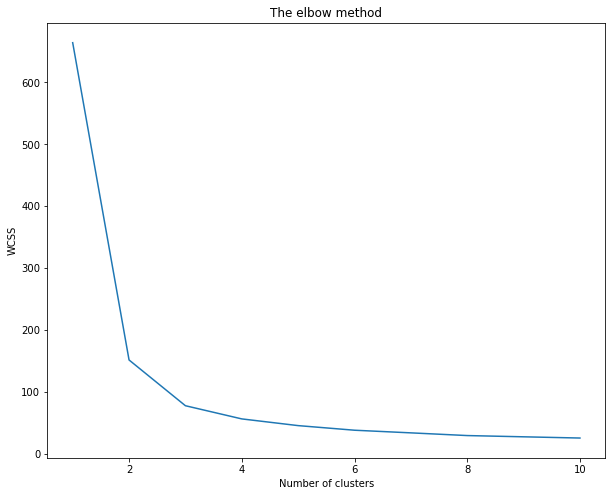

In [10]:
# Plotting the results into a line graph
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

As shown in 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This occurs when the WCSS doesn't decrease significantly with every iteration.

Hence number of clusters will be = 3.

### Fitting the Kmeans Classifier

In [11]:
# Creating the kmeans classifier with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

### Clusters Visualization

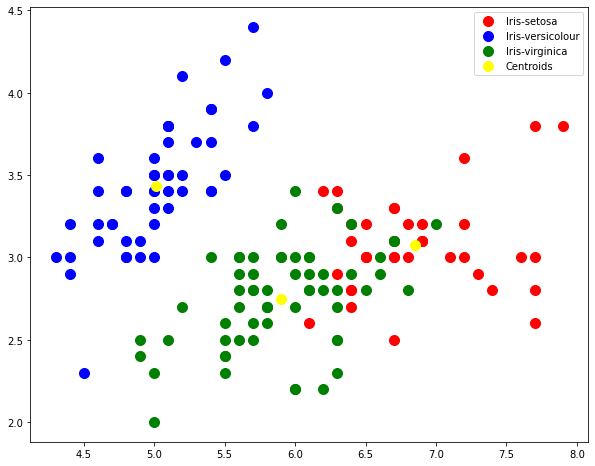

In [12]:
# Visualising the clusters by predictiting the labels and scattering them
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters to classify the data
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

This graph classifies each label by separating them and providing cluster for each one where Iris-setosa species are scattered on the right side and Iris-versicolor are scattered on the left while Iris-virginica species are scattered in between